# inistall  document

# lode   and  see data

In [ ]:
import zipfile
import os

zip_file_name = "/content/archive (6).zip"

extract_folder = "poetry_data"

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("📂 محتویات پوشه استخراج‌شده:")
print(os.listdir(extract_folder))


📂 محتویات پوشه استخراج‌شده:
['PoetryFoundationData.csv']


In [ ]:
import pandas as pd
df = pd.read_csv("/content/poetry_data/PoetryFoundationData.csv")

df = df.drop(columns=["Unnamed: 0"])

df["Title"] = df["Title"].str.strip().str.replace(r'\s+', ' ', regex=True)
df["Poem"] = df["Poem"].str.strip().str.replace(r'\s+', ' ', regex=True)
df["Poet"] = df["Poet"].str.strip()

print("📝 تعداد شعر:", len(df))
print("📌 ستون‌ها:", df.columns.tolist())
print("🎯 چند شاعر نمونه:", df['Poet'].unique()[:5])
print("🏷️ چند برچسب نمونه:", df['Tags'].dropna().unique()[:5])

df.head()


📝 تعداد شعر: 13854
📌 ستون‌ها: ['Title', 'Poem', 'Poet', 'Tags']
🎯 چند شاعر نمونه: ['Michelle Menting' 'Lucia Cherciu' 'Ted Kooser' 'Grace Cavalieri'
 'Connie Wanek']
🏷️ چند برچسب نمونه: ['Living,Time & Brevity,Relationships,Family & Ancestors,Nature,Landscapes & Pastorals,Seas, Rivers, & Streams,Social Commentaries,History & Politics'
 'Religion,The Spiritual,Mythology & Folklore,Fairy-tales & Legends'
 'Living,Parenthood,The Body,The Mind,Nature,Trees & Flowers'
 'The Body,Family & Ancestors' 'Infancy,Parenthood,The Body']


,Title,Poem,Poet,Tags
0,Objects Used to Prop Open a Window,"Dog bone, stapler, cribbage board, garlic pres...",Michelle Menting,NaN
1,The New Church,"The old cupola glinted above the clouds, shone...",Lucia Cherciu,NaN
2,Look for Me,Look for me under the hood of that old Chevrol...,Ted Kooser,NaN
3,Wild Life,"Behind the silo, the Mother Rabbit hunches lik...",Grace Cavalieri,NaN
4,Umbrella,When I push your button you fly off the handle...,Connie Wanek,NaN


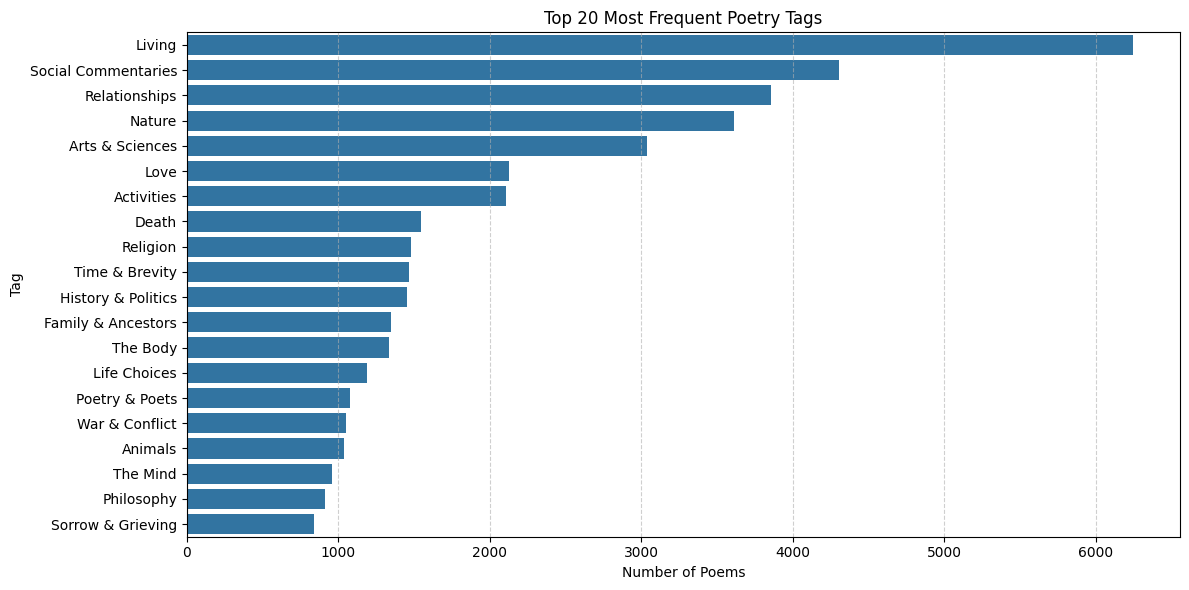

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/poetry_data/PoetryFoundationData.csv")

df = df.drop(columns=["Unnamed: 0"])

tagged_df = df.dropna(subset=["Tags"])

all_tags = tagged_df["Tags"].str.split(",").explode().str.strip()

tag_counts = all_tags.value_counts()

top_tags = tag_counts.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_tags.values, y=top_tags.index)
plt.title("Top 20 Most Frequent Poetry Tags")
plt.xlabel("Number of Poems")
plt.ylabel("Tag")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("/content/poetry_data/PoetryFoundationData.csv")

df = df.drop(columns=["Unnamed: 0"])

tagged_df = df.dropna(subset=["Tags"])

all_tags = tagged_df["Tags"].str.split(",").explode().str.strip()

tag_counts = all_tags.value_counts().reset_index()
tag_counts.columns = ["Tag", "Count"]
print("🔢 Top 20 Poetry Tags:")
print(tag_counts.head(20))


🔢 Top 20 Poetry Tags:
                    Tag  Count
0                Living   6243
1   Social Commentaries   4302
2         Relationships   3856
3                Nature   3613
4       Arts & Sciences   3039
5                  Love   2126
6            Activities   2107
7                 Death   1547
8              Religion   1483
9        Time & Brevity   1468
10   History & Politics   1456
11   Family & Ancestors   1345
12             The Body   1336
13         Life Choices   1190
14       Poetry & Poets   1077
15       War & Conflict   1053
16              Animals   1036
17             The Mind    959
18           Philosophy    912
19    Sorrow & Grieving    842


In [ ]:
import pandas as pd

df = pd.read_csv("/content/poetry_data/PoetryFoundationData.csv")

tagged_df = df.dropna(subset=["Tags"])

all_tags = tagged_df["Tags"].str.split(",").explode().str.strip()

unique_tags = sorted(all_tags.unique())

print(f"تعداد کل تگ‌های یکتا: {len(unique_tags)}\n")
for tag in unique_tags:
    print(tag)


تعداد کل تگ‌های یکتا: 129

& Streams
Activities
Animals
Anniversary
Architecture & Design
Arts & Sciences
Birth
Birth & Birthdays
Birthdays
Break-ups & Vexed Love
Buddhism
Christianity
Christmas
Cinco de Mayo
Cities & Urban Life
Class
Classic Love
Coming of Age
Crime & Punishment
Death
Desire
Disappointment & Failure
Easter
Eating & Drinking
Engagement
Fairy-tales & Legends
Faith & Doubt
Fall
Family & Ancestors
Farewells & Good Luck
Father's Day
First Love
Friends & Enemies
Funerals
Gardening
Gay
Gender & Sexuality
Get Well & Recovery
Ghosts & the Supernatural
God & the Divine
Graduation
Gratitude & Apologies
Greek & Roman Mythology
Growing Old
Halloween
Hanukkah
Health & Illness
Heartache & Loss
Heavens
Heroes & Patriotism
History & Politics
Home Life
Horror
Humor & Satire
Independence Day
Indoor Activities
Infancy
Infatuation & Crushes
Islam
Jobs & Working
Judaism
Kwanzaa
Labor Day
Landscapes & Pastorals
Language & Linguistics
Lesbian
Life Choices
Living
Love
Marriage & Companionship

#  لیبل  های  من


	برچسب نهایی (از لیست رسمی)
0	Romantic Love
1	Philosophy
2	The Spiritual
3	Living

# persian  

In [ ]:
import pandas as pd

file_path = "/content/persian_bayts_labeled_updated.csv"
df = pd.read_csv(file_path)

labels = df["Label"].unique()
print("📌 لیبل‌های موجود:", labels)

for label in labels:
    print(f"\n===== 🏷️ Label: {label} =====")
    samples = df[df["Label"] == label].sample(n=5, random_state=42)
    for i, row in samples.iterrows():
        print(f"\n📜 شاعر: {row['Poet']}")
        print(row["Bayt"]) 
        print("-" * 50)


📌 لیبل‌های موجود: ['Romantic Love' 'Philosophy' 'Living' 'The Spiritual']

===== 🏷️ Label: Romantic Love =====

📜 شاعر: khajoo
خون دل از دیده خواجو مگر / عقد ثریاست که بگسیختست
--------------------------------------------------

📜 شاعر: ferdousi
سپه دید چون کوه آهن روان / همه سر پر از گرد و تیره روان
--------------------------------------------------

📜 شاعر: bahar
آماده جنگ باش کاین چرخ حرون / با نرم دلی با تو نگردد مقرون
--------------------------------------------------

📜 شاعر: attar
سر ذراتش همه روشن شود / گلخن دنیا برو گلشن شود
--------------------------------------------------

📜 شاعر: sanaee
کی باشد کی که در تو آویزم / چون در زر و سیم مرد نادیده
--------------------------------------------------

===== 🏷️ Label: Philosophy =====

📜 شاعر: khajoo
قتیل تیغ ترا خستگان ضربت شوق / بب دیده گوهر نثار می شویند
--------------------------------------------------

📜 شاعر: attar
جان به جانان خود ده ای عطار / چند از افسانه جهان گفتن
--------------------------------------------------

📜 شاعر:

# new  labe

یبل نهایی فارسی	معادل در لیست ۸۴تایی	دلیل انتخاب
1. Love	Romantic Love	دقیق‌ترین برچسب برای عشق زمینی، دلدادگی، رابطه عاشقانه
2. Mortality	Death	بهترین نماینده برای مرگ، فنا، ناپایداری
3. Spirituality	The Spiritual	عرفان، سلوک، تجربه معنوی، خداشناسی
4. Nature & Society	Nature	نماد تجربه‌های بیرونی، طبیعت، توصیف‌های غیرعاشقانه و غیرعرفانی

In [ ]:
import pandas as pd

file_path = "/content/persian_bayts_relabels.csv"
df = pd.read_csv(file_path)

labels = df["Label"].unique()
print("📌 لیبل‌های موجود:", labels)

for label in labels:
    print(f"\n===== 🏷️ Label: {label} =====")
    samples = df[df["Label"] == label].sample(n=5, random_state=42)
    for i, row in samples.iterrows():
        print(f"\n📜 شاعر: {row['Poet']}")
        print(row["Bayt"])  
        print("-" * 50)


📌 لیبل‌های موجود: ['4. Nature & Society' '1. Love' '2. Mortality' '3. Spirituality']

===== 🏷️ Label: 4. Nature & Society =====

📜 شاعر: ferdousi
یکی پند گویم ترا من درست / دل از مهر گیتی ببایدت شست
--------------------------------------------------

📜 شاعر: sanaee
بر عاشق اگر سلام نکنی / باری بشنو سلام عاشق
--------------------------------------------------

📜 شاعر: attar
سوزنی چون دید با عیسی به هم / بخیه با روی او فکندش لاجرم
--------------------------------------------------

📜 شاعر: bahar
بدوگونه اش زعفران بیخته / بر آن زعفران سرخ می ریخته
--------------------------------------------------

📜 شاعر: roodaki
بود همچو چرزی به چنگال شاهین / ازان کوز ابری باز کردار
--------------------------------------------------

===== 🏷️ Label: 1. Love =====

📜 شاعر: khajoo
اگر از باد صبا وصف عروسان چمن / نکند باورت از بلبل گویا بشنو
--------------------------------------------------

📜 شاعر: khajoo
همچو محمود نداریم سر ملکت و تاج / که گرفتار سر زلف ایاز آمده ایم
-----------------------------------

# make engilish  data set

In [ ]:
import pandas as pd

file_path = "/content/poetry_data/PoetryFoundationData.csv"
df = pd.read_csv(file_path)

df = df.dropna(subset=["Tags"])

df_expanded = df.copy()
df_expanded = df_expanded.assign(Tag=df_expanded["Tags"].str.split(",")).explode("Tag")
df_expanded["Tag"] = df_expanded["Tag"].str.strip()

target_tags = ["Death", "Romantic Love", "The Spiritual", "Nature"]

samples = []
for tag in target_tags:
    tag_df = df_expanded[df_expanded["Tag"] == tag]
    tag_samples = tag_df.sample(n=25, random_state=42)
    for _, row in tag_samples.iterrows():
        samples.append({
            "Label": tag,
            "Poet": row["Poet"],
            "Title": str(row["Title"]).strip(),
            "Poem": str(row["Poem"]).strip()
        })

final_df = pd.DataFrame(samples)

output_path = "/content/poetry_25_samples_per_label.csv"
final_df.to_csv(output_path, index=False)

print("✅ فایل ذخیره شد:", output_path)


✅ فایل ذخیره شد: /content/poetry_25_samples_per_label.csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/poetry_25_samples_per_label.csv")

print("📌 لیبل‌های موجود:", df["Label"].unique())

for label in df["Label"].unique():
    print(f"\n===== 🏷️ Label: {label} =====")
    samples = df[df["Label"] == label].sample(n=3, random_state=1)
    for idx, row in samples.iterrows():
        print(f"\n📜 عنوان: {row['Title'].strip()}")
        print(f"👤 شاعر: {row['Poet']}")
        print("📝 شعر:")
        print(row["Poem"])
        print("-" * 60)


📌 لیبل‌های موجود: ['Death' 'Romantic Love' 'The Spiritual' 'Nature']

===== 🏷️ Label: Death =====

📜 عنوان: Strange Meeting
👤 شاعر: Wilfred Owen
📝 شعر:
It seemed that out of battle I escaped Down some profound dull tunnel, long since scooped Through granites which titanic wars had groined. Yet also there encumbered sleepers groaned, Too fast in thought or death to be bestirred. Then, as I probed them, one sprang up, and stared With piteous recognition in fixed eyes, Lifting distressful hands, as if to bless. And by his smile, I knew that sullen hall,— By his dead smile I knew we stood in Hell. With a thousand fears that vision's face was grained; Yet no blood reached there from the upper ground, And no guns thumped, or down the flues made moan. “Strange friend,” I said, “here is no cause to mourn.” “None,” said that other, “save the undone years, The hopelessness. Whatever hope is yours, Was my life also; I went hunting wild After the wildest beauty in the world, Which lies not calm in

# sampel  of  english data

In [ ]:
import pandas as pd

file_path = "/content/poetry_25_samples_per_label.csv"

df = pd.read_csv(file_path)

n = 5
sample_rows = df.sample(n, random_state=42)

# نمایش در خروجی
print(sample_rows)


            Label                 Poet  \
83         Nature  Ralph Waldo Emerson   
53  The Spiritual       Philip Freneau   
70  The Spiritual       Allen Ginsberg   
45  Romantic Love    Sir Philip Sidney   
44  Romantic Love         Donika Kelly   

                                                Title  \
83                                     The Snow-Storm   
53                          The Indian Burying Ground   
70                                   Footnote to Howl   
45  Astrophil and Stella 90: Stella, think not tha...   
44                                             Dear —   

                                                 Poem  
83  Announced by all the trumpets of the sky, Arri...  
53  In spite of all the learned have said,     I s...  
70  Holy! Holy! Holy! Holy! Holy! Holy! Holy! Holy...  
45  Stella, think not that I by verse seek fame, W...  
44  I am not land or timber\r\r\nnor are you\r\r\n...  


Minimum length: 58
Maximum length: 18110
Average length: 1848.32
Median length: 915.0


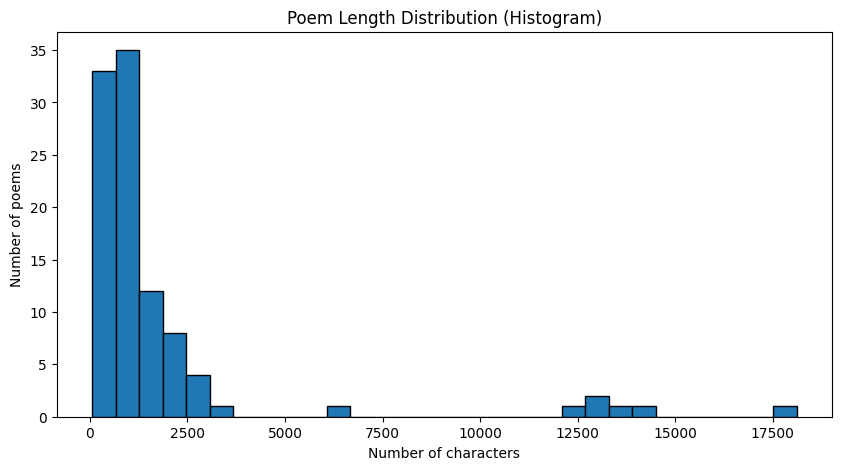

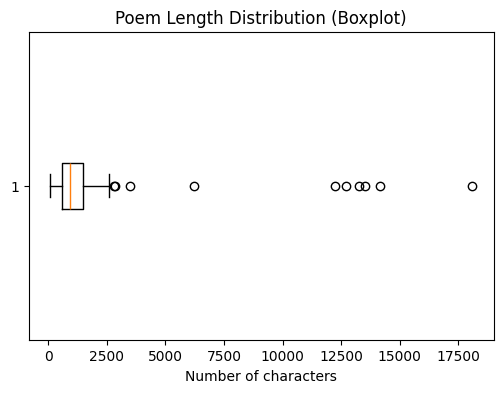

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/poetry_25_samples_per_label.csv"
df = pd.read_csv(file_path)

df["Poem_length"] = df["Poem"].astype(str).apply(len)

print("Minimum length:", df["Poem_length"].min())
print("Maximum length:", df["Poem_length"].max())
print("Average length:", df["Poem_length"].mean())
print("Median length:", df["Poem_length"].median())

plt.figure(figsize=(10,5))
plt.hist(df["Poem_length"], bins=30, edgecolor="black")
plt.title("Poem Length Distribution (Histogram)")
plt.xlabel("Number of characters")
plt.ylabel("Number of poems")
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df["Poem_length"], vert=False)
plt.title("Poem Length Distribution (Boxplot)")
plt.xlabel("Number of characters")
plt.show()


Minimum length: 4
Maximum length: 88699
Average length: 1505.4722823733218
Median length: 921.0


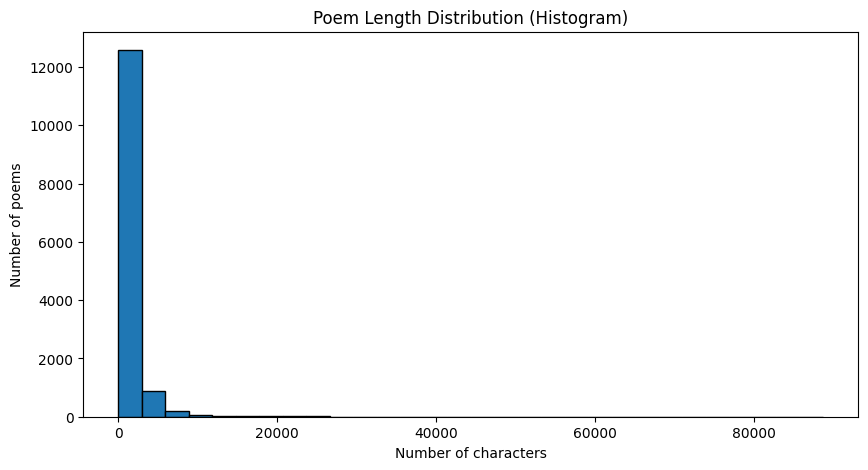

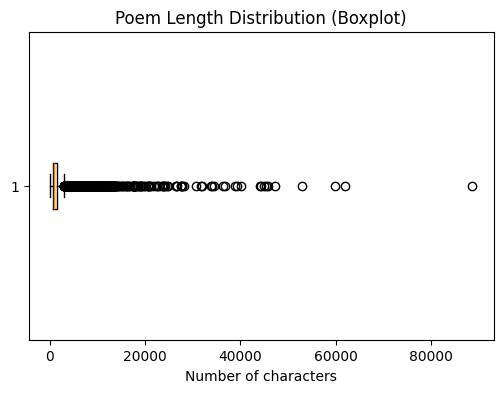

In [ ]:
import pandas as pd
df = pd.read_csv("/content/poetry_data/PoetryFoundationData.csv")

df["Poem_length"] = df["Poem"].astype(str).apply(len)

print("Minimum length:", df["Poem_length"].min())
print("Maximum length:", df["Poem_length"].max())
print("Average length:", df["Poem_length"].mean())
print("Median length:", df["Poem_length"].median())

plt.figure(figsize=(10,5))
plt.hist(df["Poem_length"], bins=30, edgecolor="black")
plt.title("Poem Length Distribution (Histogram)")
plt.xlabel("Number of characters")
plt.ylabel("Number of poems")
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df["Poem_length"], vert=False)
plt.title("Poem Length Distribution (Boxplot)")
plt.xlabel("Number of characters")
plt.show()


In [ ]:
import pandas as pd

df = df.dropna(subset=["Tags"])

df_expanded = df.copy()
df_expanded = df_expanded.assign(Tag=df_expanded["Tags"].str.split(",")).explode("Tag")
df_expanded["Tag"] = df_expanded["Tag"].str.strip()

target_tags = ["Death", "Romantic Love", "The Spiritual", "Nature"]

samples = []
for tag in target_tags:
    tag_df = df_expanded[df_expanded["Tag"] == tag]
    for _, row in tag_df.iterrows():
        samples.append({
            "Label": tag,
            "Poet": row["Poet"],
            "Title": str(row["Title"]).strip(),
            "Poem": str(row["Poem"]).strip()
        })

final_df = pd.DataFrame(samples)

print("Number of poems for each label:")
print(final_df["Label"].value_counts())


Number of poems for each label:
Label
Nature           3613
Death            1547
Romantic Love     486
The Spiritual     385
Name: count, dtype: int64


In [ ]:

final_df["Poem_length"] = final_df["Poem"].astype(str).apply(len)

length_distribution = final_df.groupby("Label")["Poem_length"].describe()

print("Poem length distribution by label:")
print(length_distribution)


Poem length distribution by label:
                count         mean          std   min    25%     50%      75%  \
Label                                                                           
Death          1547.0  1760.936652  2824.369693   0.0  625.5  1051.0  1806.00   
Nature         3613.0  1578.396623  2859.719952   0.0  581.0   932.0  1618.00   
Romantic Love   486.0  1237.366255  1756.013980  33.0  592.0   731.5  1196.75   
The Spiritual   385.0  2021.514286  5101.362771   0.0  603.0  1070.0  1928.00   

                   max  
Label                   
Death          45726.0  
Nature         88693.0  
Romantic Love  18983.0  
The Spiritual  88693.0  


In [ ]:
import pandas as pd

file_path = "/content/poetry_25_samples_per_label.csv"
df = pd.read_csv(file_path)

df.columns = [c.strip() for c in df.columns]

nature_df = df[df["Label"].astype(str).str.strip().str.lower() == "nature"]

nature_samples = nature_df.sample(n=min(2, len(nature_df)), random_state=42)

for i, row in nature_samples.iterrows():
    print("="*60)
    print("Poet:", row["Poet"])
    print("Title:", row["Title"])
    print("Poem:\n", row["Poem"])


Poet: Ralph Waldo Emerson
Title: The Snow-Storm
Poem:
 Announced by all the trumpets of the sky, Arrives the snow, and, driving o'er the fields, Seems nowhere to alight: the whited air Hides hills and woods, the river, and the heaven, And veils the farm-house at the garden's end. The sled and traveller stopped, the courier's feet Delayed, all friends shut out, the housemates sit Around the radiant fireplace, enclosed In a tumultuous privacy of storm. Come see the north wind's masonry. Out of an unseen quarry evermore Furnished with tile, the fierce artificer Curves his white bastions with projected roof Round every windward stake, or tree, or door. Speeding, the myriad-handed, his wild work So fanciful, so savage, nought cares he For number or proportion. Mockingly, On coop or kennel he hangs Parian wreaths; A swan-like form invests the hidden thorn; Fills up the farmer's lane from wall to wall, Maugre the farmer's sighs; and, at the gate, A tapering turret overtops the work. And when 

# sampel poms  with love label

In [ ]:
import pandas as pd

file_path = "/content/poetry_25_samples_per_label.csv"
df = pd.read_csv(file_path)

df.columns = [c.strip() for c in df.columns]

love_df = df[df["Label"].astype(str).str.strip().str.lower() == "romantic love"]

love_sample = love_df.sample(n=min(1, len(love_df)), random_state=10)

for i, row in love_sample.iterrows():
    print("="*60)
    print("Poet:", row["Poet"])
    print("Title:", row["Title"])
    print("Poem:\n", row["Poem"])



Poet: Sir  Thomas Wyatt
Title: They Flee From Me
Poem:




















I would fain know what she hath deserved.


# sampel data prsian

In [ ]:
import pandas as pd

file_path = "/content/persian_bayts_relabels.csv"
df = pd.read_csv(file_path)

sanaee_sample = df[df["Poet"] == "sanaee"].sample(1, random_state=42)

for i, row in sanaee_sample.iterrows():
    print("="*60)
    print("Poet:", row["Poet"])
    print("Label:", row["Label"])
    print("Poem:\n", row["Bayt"])


Poet: sanaee
Label: 4. Nature & Society
Poem:
 آفت آینه آهست شما از سر عجز / پیش آن روی چو آیینه چرا آه کنید


In [ ]:
import pandas as pd

file_path = "/content/persian_bayts_relabels.csv"
df = pd.read_csv(file_path)

love_df = df[df["Label"].str.contains("Love", case=False, na=False)]

print("Total Love poems:", len(love_df))
print("="*60)

for i, row in love_df.iterrows():
    print("Poet:", row["Poet"])
    print("Label:", row["Label"])
    print("Poem:\n", row["Bayt"])
    print("-"*60)


Total Love poems: 13
Poet: roodaki
Label: 1. Love
Poem:
 که نیز تا نچمم کار من نگیرد چم / گر کند یاریی مرا به غم عشق آن صنم
------------------------------------------------------------
Poet: sanaee
Label: 1. Love
Poem:
 سیر بستان چو شیر پستان خوش / شود ار جور شه کند دیدار
------------------------------------------------------------
Poet: sanaee
Label: 1. Love
Poem:
 هر روز نپویی تو جز عشق نجویی تو / ای ماه نکویی تو آخر چه خصالست این
------------------------------------------------------------
Poet: ferdousi
Label: 1. Love
Poem:
 بپور زره گفت نام تو چیست / ز ترکان جنگی ترا یار کیست
------------------------------------------------------------
Poet: ferdousi
Label: 1. Love
Poem:
 بکشتند هرکس که بد نامدار / همی تاختند از پس شهریار
------------------------------------------------------------
Poet: attar
Label: 1. Love
Poem:
 هر که او در عشق بی آرام نیست / کی تواند یافت آرام ای غلام
------------------------------------------------------------
Poet: attar
Label: 1. Love
Poem:
 لب لعلش جهان را

#  cheack  label

In [ ]:
print(df.columns)


Index(['Title', 'Poem', 'Poet', 'Tags'], dtype='object')


In [ ]:

nature_rows = df[df["Tags"].str.strip().str.lower() == "nature"]

print(nature_rows.iloc[0])



Title                                      Morning Warming
Poem     sun sunwarm sunwarm on back sunwarm on back le...
Poet                                          Joyce Sidman
Tags                                                Nature
Name: 1221, dtype: object


In [ ]:
print(nature_rows.iloc[0]["Poem"])


sun sunwarm sunwarm on back sunwarm on back legs sunwarm on back legs loosens my heart my heart beats my heart beats faster in sunwarm my heart beats faster I flex I flex legs I flex legs loose with sunwarm I drink dew from dripping leaves I beat flex crouch leap! What am I? (grasshopper) ﻿


In [ ]:

nature_rows = df[df["Tags"].str.strip().str.lower() == "Social Commentaries"]

print(nature_rows.iloc[0]["Poem"])


IndexError: single positional indexer is out-of-bounds

In [ ]:
tag_value = "Social Commentaries"
nature_rows = df[df["Tags"].str.strip().str.lower() == tag_value.lower()]

print(len(nature_rows))   


37


In [ ]:
print(nature_rows.iloc[0]["Poem"])

the rooms are chosen, then they move on the beads are wetted in the lime the weedlot boils in the blood of one eye the children first are cankered then they spin there are not routes, only dials the rocks are spun together in one ball the laundry is of rust, the pillow shrieks pianos all blow northward and return must be a bath if I could find it is a map of all the ways that center intermission skulls are simply caps for all compression day’s light raising closets for its dark I put up the clothes and trail the keys that onyx knob in vacuum turns the train pressure on the pitches swaying back again a world without a heartbeat but it stays


# see pomse  persian

# SET  ATTAR

In [ ]:
!pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.9 MB/s eta 0:00:00


In [ ]:


from pathlib import Path

INPUT = Path("/content/attar_norm.txt")  
OUT_PREFIX = "attar_part"      
PARTS = 5                        

def load_lines(path: Path):
    encs = ["utf-8-sig","utf-8","cp1256","windows-1256","latin-1"]
    for enc in encs:
        try:
            text = path.read_text(encoding=enc)
            break
        except Exception:
            continue
    else:
        raise RuntimeError("⛔️ نتوانستم فایل را با هیچ انکودینگی بخوانم.")
    
    lines = [ln.strip() for ln in text.splitlines() if ln.strip()]
    return lines

def ensure_even(n: int) -> int:
    return n if n % 2 == 0 else n - 1

def split_into_parts(lines, parts=5):
    N = len(lines)
    base = N // parts
    rem  = N % parts
    sizes = [(base + (1 if i < rem else 0)) for i in range(parts)]
    
    sizes = [ensure_even(s) for s in sizes]

    deficit = N - sum(sizes)
    if deficit > 0:
        if deficit % 2 == 1:
            deficit -= 1
        sizes[-1] += deficit

    if sum(sizes) > N:
        overflow = sum(sizes) - N
        sizes[-1] -= overflow

    parts_list = []
    idx = 0
    for s in sizes:
        parts_list.append(lines[idx:idx+s])
        idx += s
    return parts_list

def save_parts(parts_list, prefix="attar_part"):
    paths = []
    for i, chunk in enumerate(parts_list, start=1):
        p = Path(f"{prefix}{i}.txt")
        p.write_text("\n".join(chunk), encoding="utf-8")
        paths.append((str(p), len(chunk)))
    return paths

lines = load_lines(INPUT)
parts_list = split_into_parts(lines, PARTS)
paths = save_parts(parts_list, OUT_PREFIX)

print("✅ تقسیم انجام شد. خلاصه:")
total = 0
for p, n in paths:
    print(f"- {p}: {n} line(s)  | even={n%2==0}")
    total += n
print(f"جمع خطوط: {total} (از {len(lines)})")


✅ تقسیم انجام شد. خلاصه:
- attar_part1.txt: 38088 line(s)  | even=True
- attar_part2.txt: 38088 line(s)  | even=True
- attar_part3.txt: 38088 line(s)  | even=True
- attar_part4.txt: 38088 line(s)  | even=True
- attar_part5.txt: 38086 line(s)  | even=True
جمع خطوط: 190438 (از 190439)


# CREAT PERSIAN FILE

In [ ]:
import pandas as pd

files_list = [
    "/content/saeb_50_bayts_death.xlsx",
    "/content/khayyam_50_bayts_death.xlsx",
    "/content/bidel_50_bayts_death.xlsx"
]

dfs = []
for f in files_list:
    df = pd.read_excel(f)
    if "ok" in df.columns:  
        dfs.append(df[df["ok"] == 1])

final_df = pd.concat(dfs, ignore_index=True)

output_file = "/content/merged_ok_rows.xlsx"
final_df.to_excel(output_file, index=False)

print("فایل خروجی ساخته شد:", output_file)


فایل خروجی ساخته شد: /content/merged_ok_rows.xlsx


# love

In [ ]:
import pandas as pd
files_list = [
    "/content/hafez_50_bayts_love.xlsx",
    "/content/shahriar_50_bayts_love.xlsx",
    "/content/vahshi_50_bayts_love.xlsx"
]

dfs = []
for f in files_list:
    df = pd.read_excel(f)
    if "ok" in df.columns:   
        dfs.append(df[df["ok"] == 1])

final_df = pd.concat(dfs, ignore_index=True)
output_file = "/content/merged_ok_rows_love.xlsx"
final_df.to_excel(output_file, index=False)

print("فایل خروجی ساخته شد:", output_file)


فایل خروجی ساخته شد: /content/merged_ok_rows_love.xlsx


#  spectural


In [ ]:
import pandas as pd

files_list = [
    "/content/attar_tawhid_70.xlsx",
    "/content/abusaeed_50_bayts_god_focused.xlsx"
]

dfs = []
for f in files_list:
    df = pd.read_excel(f)
    if "ok" in df.columns:  
        dfs.append(df[df["ok"] == 1])
final_df = pd.concat(dfs, ignore_index=True)
output_file = "/content/merged_ok_rows_tawhid.xlsx"
final_df.to_excel(output_file, index=False)

print("فایل خروجی ساخته شد:", output_file)


فایل خروجی ساخته شد: /content/merged_ok_rows_tawhid.xlsx


In [ ]:
import pandas as pd

files_list = [
    "/content/saadi_50_bayts_philosophy_new.xlsx",
    "/content/khaghani_50_bayts_philosophy.xlsx",
    "/content/four_poets_150_bayts_philosophy.xlsx" 
]

dfs = []
for f in files_list:
    df = pd.read_excel(f)
    if "ok" in df.columns:  
        dfs.append(df[df["ok"] == 1])

final_df = pd.concat(dfs, ignore_index=True)

output_file = "/content/merged_ok_rows_philosophy.xlsx"
final_df.to_excel(output_file, index=False)

print("فایل خروجی ساخته شد:", output_file)


فایل خروجی ساخته شد: /content/merged_ok_rows_philosophy.xlsx


# marge  label

In [ ]:
import pandas as pd

files_labels = {
    "/content/merged_ok_rows_love.xlsx": "Love",
    "/content/merged_ok_rows_tawhid.xlsx": "The Spiritual",
    "/content/DETH.xlsx": "Death",
    "/content/merged_ok_rows_philosophy.xlsx": "Philosophy"
}

dfs = []

for f, label in files_labels.items():
    df = pd.read_excel(f)
    df["Label"] = label   
    dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)

output_file = "/content/merged_all_labels.xlsx"
final_df.to_excel(output_file, index=False)

print("فایل خروجی ساخته شد:", output_file)


فایل خروجی ساخته شد: /content/merged_all_labels.xlsx


In [ ]:
import pandas as pd

df = pd.read_excel("/content/merged_all_labels.xlsx")

df = df.drop(columns=["لیبل"], errors="ignore")

output_file = "/content/merged_all_labels_no_farsi_label.xlsx"
df.to_excel(output_file, index=False)

print("فایل خروجی بدون ستون لیبل فارسی ساخته شد:", output_file)


فایل خروجی بدون ستون لیبل فارسی ساخته شد: /content/merged_all_labels_no_farsi_label.xlsx


In [ ]:
pip install unidecode pandas matplotlib openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 14.2 MB/s eta 0:00:00


Saved pivot -> poems_per_poet_by_label_ManualEN.csv


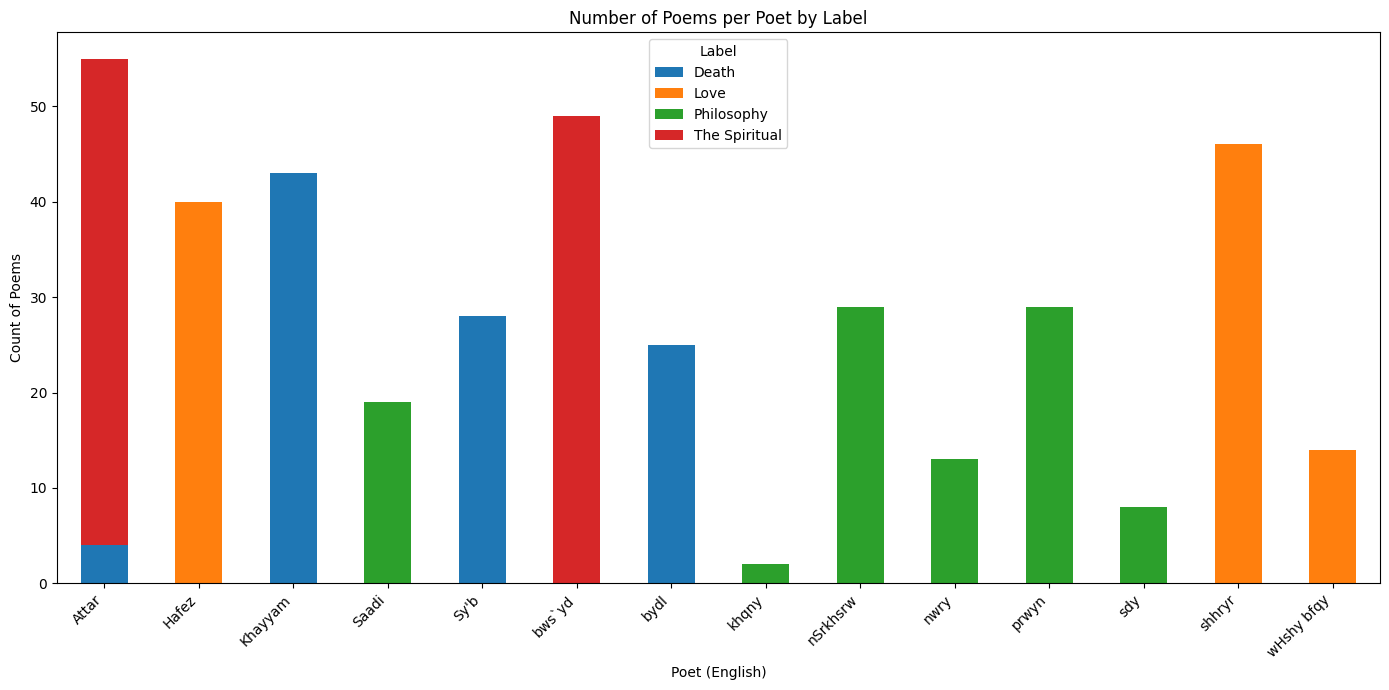

Saved plot -> poems_per_poet_by_label_ManualEN.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from unidecode import unidecode

excel_path = Path("merged_all_labels_no_farsi_label.xlsx")
POET_COL_OVERRIDE  = "شاعر"   
LABEL_COL_OVERRIDE = "Label"

df = pd.read_excel(excel_path)

poet_col  = POET_COL_OVERRIDE
label_col = LABEL_COL_OVERRIDE

name_map_manual = {
    "حافظ": "Hafez",
    "سعدی": "Saadi",
    "فردوسی": "Ferdowsi",
    "مولوی": "Rumi",
    "خیام": "Khayyam",
    "نظامی": "Nezami",
    "باباطاهر": "Baba Taher",
    "عطار": "Attar",
}
def poet_to_en(name):
    name = str(name).strip()
    return name_map_manual.get(name, unidecode(name))

df["_poet_en_"] = df[poet_col].map(poet_to_en)

pivot = (
    df.groupby(["_poet_en_", label_col])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)
csv_path = excel_path.with_name("poems_per_poet_by_label_ManualEN.csv")
pivot.to_csv(csv_path, encoding="utf-8-sig")
print(f"Saved pivot -> {csv_path}")

ax = pivot.plot(kind="bar", stacked=True, figsize=(14, 7))
ax.set_title("Number of Poems per Poet by Label")
ax.set_xlabel("Poet (English)")
ax.set_ylabel("Count of Poems")
ax.set_xticklabels(pivot.index.tolist(), rotation=45, ha="right")

plt.tight_layout()
img_path = excel_path.with_name("poems_per_poet_by_label_ManualEN.png")
plt.savefig(img_path, dpi=160, bbox_inches="tight")
plt.show()
print(f"Saved plot -> {img_path}")


# creat english  data

In [ ]:
import zipfile
import pandas as pd
import os

zip_path = "/content/archive (6).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

files = os.listdir("/content/dataset")
print("فایل‌های موجود:", files)

data_file = None
for f in files:
    if f.endswith(".csv") or f.endswith(".xlsx") or f.endswith(".xls"):
        data_file = f
        break

if data_file is None:
    raise FileNotFoundError("هیچ فایل CSV یا Excel در زیپ پیدا نشد!")

file_path = os.path.join("/content/dataset", data_file)
print("فایل انتخاب‌شده:", file_path)

# لود فایل بسته به نوعش
if file_path.endswith(".csv"):
    df = pd.read_csv(file_path)
else:
    df = pd.read_excel(file_path)

# نمایش چند ردیف اول
df.head()


فایل‌های موجود: ['PoetryFoundationData.csv']
فایل انتخاب‌شده: /content/dataset/PoetryFoundationData.csv


,Unnamed: 0,Title,Poem,Poet,Tags
0,0,\r\r\n Objects Used to Prop...,"\r\r\nDog bone, stapler,\r\r\ncribbage board, ...",Michelle Menting,NaN
1,1,\r\r\n The New Church\r\r\n...,"\r\r\nThe old cupola glinted above the clouds,...",Lucia Cherciu,NaN
2,2,\r\r\n Look for Me\r\r\n ...,\r\r\nLook for me under the hood\r\r\nof that ...,Ted Kooser,NaN
3,3,\r\r\n Wild Life\r\r\n ...,"\r\r\nBehind the silo, the Mother Rabbit\r\r\n...",Grace Cavalieri,NaN
4,4,\r\r\n Umbrella\r\r\n ...,\r\r\nWhen I push your button\r\r\nyou fly off...,Connie Wanek,NaN


In [ ]:
import pandas as pd
import re
import os

file_path = "/content/dataset/PoetryFoundationData.csv"

df = pd.read_csv(file_path)

extra_cols = [c for c in df.columns if c.lower().startswith("unnamed")]
df = df.drop(columns=extra_cols, errors="ignore")

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = (
            df[col]
            .astype(str)                                  
            .str.replace(r"\\r|\\n", " ", regex=True)     
            .str.replace(r"[\r\n]+", " ", regex=True)   
            .str.replace(r"\s+", " ", regex=True)         
            .str.strip()
            .replace({"nan": None})                      
        )

if "Tags" in df.columns:
    df["Tags"] = df["Tags"].apply(lambda x: None if (x is None or x == "" or pd.isna(x))
                                  else [t.strip() for t in re.split(r"[|,;/]", str(x)) if t.strip()])

print(df.shape)
df.head()


(13854, 4)


,Title,Poem,Poet,Tags
0,Objects Used to Prop Open a Window,"Dog bone, stapler, cribbage board, garlic pres...",Michelle Menting,None
1,The New Church,"The old cupola glinted above the clouds, shone...",Lucia Cherciu,None
2,Look for Me,Look for me under the hood of that old Chevrol...,Ted Kooser,None
3,Wild Life,"Behind the silo, the Mother Rabbit hunches lik...",Grace Cavalieri,None
4,Umbrella,When I push your button you fly off the handle...,Connie Wanek,None


In [ ]:
import os
import re
import pandas as pd

def normalize_text(s: str) -> str:
    s = str(s)
    s = s.replace("’", "'").replace("‘", "'")
    s = s.replace("&", "&")  
    s = re.sub(r"\s+", " ", s)
    s = s.strip().lower()
    return s

def ensure_tags_list(x):
    if x is None or (isinstance(x, float) and pd.isna(x)):
        return []
    if isinstance(x, list):
        return [normalize_text(t) for t in x if str(t).strip() != ""]
    parts = [normalize_text(p) for p in re.split(r"[|,;/]", str(x)) if p.strip() != ""]
    return parts

df = df.copy()

if "Tags" not in df.columns:
    df["Tags"] = [[]]
else:
    df["Tags"] = df["Tags"].apply(ensure_tags_list)

if "Poem" not in df.columns:
    df["Poem"] = ""

df = df[df["Poem"].astype(str).str.strip() != ""].reset_index(drop=True)

df["Poem_word_count"] = df["Poem"].astype(str).apply(lambda x: len(x.split()))
df["Poem_char_count"] = df["Poem"].astype(str).str.len()

love_tags = {
    "love", "romantic love", "classic love",
    "first love", "unrequited love", "infatuation & crushes",
    "break-ups & vexed love", "heartache & loss",
    "anniversary", "engagement", "marriage & companionship",
    "relationships", "separation & divorce", "valentine's day",
    "weddings",  
}

philosophy_tags = {
    "philosophy",
}

death_tags = {
    "death",
}

spiritual_tags = {
    "the spiritual", "religion", "god & the divine", "faith & doubt",
    "christianity", "islam", "judaism", "buddhism", "other religions",
    "ramadan", "passover", "rosh hashanah", "hanukkah", "yom kippur",
}
tag2label = {}
for t in love_tags:
    tag2label[normalize_text(t)] = "love"
for t in philosophy_tags:
    tag2label[normalize_text(t)] = "philosophy"
for t in death_tags:
    tag2label[normalize_text(t)] = "death"
for t in spiritual_tags:
    tag2label[normalize_text(t)] = "the spiritual"

def matched_labels(tag_list):
    labs = set()
    for t in tag_list:
        if t in tag2label:
            labs.add(tag2label[t])
    return sorted(labs)

df["matched_labels"] = df["Tags"].apply(matched_labels)
df_single = df[df["matched_labels"].apply(len) == 1].copy()
df_multi  = df[df["matched_labels"].apply(len) > 1].copy()  
df_none   = df[df["matched_labels"].apply(len) == 0].copy()  

df_single["Label"] = df_single["matched_labels"].apply(lambda xs: xs[0] if xs else None)

cols_keep = ["Label", "Title", "Poet", "Poem", "Tags", "Poem_word_count", "Poem_char_count"]
for c in cols_keep:
    if c not in df_single.columns:
        df_single[c] = None

labeled_df = df_single[cols_keep].reset_index(drop=True)

print("کل شعرها:", len(df))
print("شعرهای تک‌لیبلی (بدون اورلپ):", labeled_df.shape)
print("حذف‌شده: چندلیبلی:", df_multi.shape, " | بدون لیبل هدف:", df_none.shape)

if labeled_df.empty:
    raise SystemExit("هیچ شعری با شرط «دقیقاً یک لیبل از چهار لیبل» پیدا نشد. شاید لازم باشد نگاشت تگ‌ها را گسترش دهیم.")

def summarize_group(g):
    return pd.Series({
        "num_poems": g.shape[0],
        "num_unique_poets": g["Poet"].nunique(),
        "word_min": int(g["Poem_word_count"].min()),
        "word_median": float(g["Poem_word_count"].median()),
        "word_mean": float(g["Poem_word_count"].mean()),
        "word_max": int(g["Poem_word_count"].max()),
        "char_min": int(g["Poem_char_count"].min()),
        "char_median": float(g["Poem_char_count"].median()),
        "char_mean": float(g["Poem_char_count"].mean()),
        "char_max": int(g["Poem_char_count"].max()),
    })

summary = (
    labeled_df.groupby("Label")
    .apply(summarize_group)
    .reset_index()
    .sort_values("Label")
)

print("\nخلاصه‌ی آماری هر لیبل (شعرهای تک‌لیبلی):")
print(summary)
out_dir = "/content/dataset/labels_no_overlap_v2"
os.makedirs(out_dir, exist_ok=True)

for lab in ["love", "philosophy", "death", "the spiritual"]:
    sub = labeled_df[labeled_df["Label"] == lab]
    if not sub.empty:
        sub.to_csv(os.path.join(out_dir, f"{lab.replace(' ', '_')}.csv"), index=False)

labeled_df.to_csv(os.path.join(out_dir, "poems_single_label.csv"), index=False)
df_multi.to_csv(os.path.join(out_dir, "poems_multi_label_excluded.csv"), index=False)
df_none.to_csv(os.path.join(out_dir, "poems_no_target_label.csv"), index=False)
summary.to_csv(os.path.join(out_dir, "summary_by_label.csv"), index=False)

print(f"\nخروجی‌ها ذخیره شدند در: {out_dir}")

for lab in ["love", "philosophy", "death", "the spiritual"]:
    sub = labeled_df[labeled_df["Label"] == lab]
    if sub.empty:
        print(f"\n[نمونه] {lab}: هیچ شعر تک‌لیبلی یافت نشد.")
        continue
    print(f"\n[نمونه] {lab}: {min(5, len(sub))} شعر")
    print(sub[["Title", "Poet", "Poem_word_count"]].head(5).to_string(index=False))


کل شعرها: 13753
شعرهای تک‌لیبلی (بدون اورلپ): (5762, 7)
حذف‌شده: چندلیبلی: (1437, 7)  | بدون لیبل هدف: (6554, 7)

خلاصه‌ی آماری هر لیبل (شعرهای تک‌لیبلی):
           Label  num_poems  num_unique_poets  word_min  word_median  \
0          death      778.0             546.0       3.0        153.0   
1           love     3650.0            1607.0       1.0        154.0   
2     philosophy      434.0             328.0       5.0        152.5   
3  the spiritual      900.0             575.0       8.0        151.0   

    word_mean  word_max  char_min  char_median    char_mean  char_max  
0  267.924165    6015.0      15.0        838.0  1459.070694   32849.0  
1  239.361370    9451.0      10.0        844.0  1310.786027   54103.0  
2  279.460829    4356.0      30.0        817.0  1555.161290   23519.0  
3  338.942222    9047.0      50.0        840.0  1886.934444   50627.0  


/tmp/ipython-input-1381427568.py:136: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarize_group)



خروجی‌ها ذخیره شدند در: /content/dataset/labels_no_overlap_v2

[نمونه] love: 5 شعر
                                        Title                Poet  Poem_word_count
                               Invisible Fish           Joy Harjo               57
                    The Opposite of Nostalgia      Eric Gamalinda              173
“In the Evening We Shall Be Examined on Love”   Thomas Centolella              252
 Mom Betty Addresses the Nature of Proportion    Eileen R. Tabios              107
                                 Memorial Day Sunnylyn Thibodeaux              119

[نمونه] philosophy: 5 شعر
                                                      Title                  Poet  Poem_word_count
                                                   Maxims 1        Anthony Madrid              218
                                                   Maxims 2        Anthony Madrid              889
                                    Emperor with No Clothes      Joseph Di Prisco             

# save

In [ ]:
import os
import shutil

out_dir = "/content/dataset/labels_no_overlap_v2"

zip_base = "/content/labels_no_overlap_v2" 
zip_path = f"{zip_base}.zip"
if os.path.exists(zip_path):
    os.remove(zip_path)

shutil.make_archive(zip_base, 'zip', out_dir)
print("ZIP created at:", zip_path)

try:
    from google.colab import files
    files.download(zip_path)
    print("Downloading...")
except Exception as e:
    print("Not in Colab (or download helper not available). Zip is saved locally at:", zip_path)


ZIP created at: /content/labels_no_overlap_v2.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloading...


# small size


In [ ]:
import os, re
import pandas as pd

def normalize_text(s: str) -> str:
    s = str(s)
    s = s.replace("’", "'").replace("‘", "'")
    s = re.sub(r"\s+", " ", s)
    return s.strip().lower()

def ensure_tags_list(x):
    if x is None or (isinstance(x, float) and pd.isna(x)):
        return []
    if isinstance(x, list):
        return [normalize_text(t) for t in x if str(t).strip() != ""]
    parts = [normalize_text(p) for p in re.split(r"[|,;/]", str(x)) if p.strip() != ""]
    return parts

df2 = df.copy()
df2["Tags"] = df2["Tags"].apply(ensure_tags_list) if "Tags" in df2.columns else [[]]
df2["Poem"] = df2["Poem"].astype(str).str.strip()
df2 = df2[df2["Poem"] != ""].reset_index(drop=True)

df2["Poem_word_count"] = df2["Poem"].apply(lambda x: len(x.split()))
df2["Poem_char_count"] = df2["Poem"].str.len()

love_tags = {
    "love", "romantic love", "classic love",
    "first love", "unrequited love", "infatuation & crushes",
    "break-ups & vexed love", "heartache & loss",
    "anniversary", "engagement", "marriage & companionship",
    "relationships", "separation & divorce", "valentine's day",
    "weddings",
}
philosophy_tags = {
    "philosophy",
}
death_tags = {
    "death",
}
spiritual_tags = {
    "the spiritual", "religion", "god & the divine", "faith & doubt",
    "christianity", "islam", "judaism", "buddhism", "other religions",
    "ramadan", "passover", "rosh hashanah", "hanukkah", "yom kippur",
}

tag2label = {}
for t in love_tags:        tag2label[normalize_text(t)] = "love"
for t in philosophy_tags:  tag2label[normalize_text(t)] = "philosophy"
for t in death_tags:       tag2label[normalize_text(t)] = "death"
for t in spiritual_tags:   tag2label[normalize_text(t)] = "the spiritual"
def matched_labels(tag_list):
    labs = set()
    for t in tag_list:
        if t in tag2label:
            labs.add(tag2label[t])
    return sorted(labs)

df2["matched_labels"] = df2["Tags"].apply(matched_labels)

df_single = df2[df2["matched_labels"].apply(len) == 1].copy()
df_single["Label"] = df_single["matched_labels"].apply(lambda xs: xs[0])

rows = []
for _, r in df_single.iterrows():
    rows.append({
        "Label": r["Label"],
        "Title": r.get("Title"),
        "Poet": r.get("Poet"),
        "Poem": r.get("Poem"),
        "Tags": r.get("Tags"),
        "Poem_word_count": r["Poem_word_count"],
        "Poem_char_count": r["Poem_char_count"],
    })

labeled = pd.DataFrame(rows)
if labeled.empty:
    raise SystemExit("هیچ شعر تک‌لیبلی مطابق نگاشت چهارگانه پیدا نشد.")

print("تعداد شعرهای تک‌لیبلی (قبل از فیلتر طول):", len(labeled))

MAX_WORDS = 340
filtered = labeled[labeled["Poem_word_count"] <= MAX_WORDS].reset_index(drop=True)

print("تعداد شعرهای تک‌لیبلی با طول ≤ 340 کلمه:", len(filtered))

summary = (
    filtered
    .groupby("Label", as_index=False)
    .agg(num_poems=("Poem", "size"),
         num_unique_poets=("Poet", "nunique"),
         word_min=("Poem_word_count", "min"),
         word_median=("Poem_word_count", "median"),
         word_mean=("Poem_word_count", "mean"),
         word_max=("Poem_word_count", "max"),
         char_min=("Poem_char_count", "min"),
         char_median=("Poem_char_count", "median"),
         char_mean=("Poem_char_count", "mean"),
         char_max=("Poem_char_count", "max"))
    .sort_values("Label")
)
print("\nآمار هر لیبل (پس از فیلتر ≤ 340 کلمه، تک‌لیبلی):")
print(summary)

out_dir = "/content/dataset/labels_max340_singlelabel"
os.makedirs(out_dir, exist_ok=True)

combined_path = os.path.join(out_dir, "poems_4labels_max340_singlelabel.csv")
filtered.to_csv(combined_path, index=False)

for lab in ["love", "philosophy", "death", "the spiritual"]:
    sub = filtered[filtered["Label"] == lab]
    if not sub.empty:
        sub.to_csv(os.path.join(out_dir, f"{lab.replace(' ', '_')}_max340_singlelabel.csv"), index=False)

summary_path = os.path.join(out_dir, "summary_by_label_max340_singlelabel.csv")
summary.to_csv(summary_path, index=False)

print(f"\nذخیره شد: {combined_path}")
print(f"خلاصه‌ی آماری: {summary_path}")

for lab in ["love", "philosophy", "death", "the spiritual"]:
    sub = filtered[filtered["Label"] == lab]
    print(f"\n[نمونه‌ها] {lab} — {len(sub)} شعر (≤ {MAX_WORDS} کلمه):")
    print(sub[["Title", "Poet", "Poem_word_count"]].head(5).to_string(index=False))


تعداد شعرهای تک‌لیبلی (قبل از فیلتر طول): 5762
تعداد شعرهای تک‌لیبلی با طول ≤ 340 کلمه: 4771

آمار هر لیبل (پس از فیلتر ≤ 340 کلمه، تک‌لیبلی):
           Label  num_poems  num_unique_poets  word_min  word_median  \
0          death        641               472         3        126.0   
1           love       3042              1449         1        132.0   
2     philosophy        348               281         5        122.0   
3  the spiritual        740               509         8        129.0   

    word_mean  word_max  char_min  char_median   char_mean  char_max  
0  143.137285       340        15        706.0  793.241810      1949  
1  147.832676       340        10        717.5  808.416174      2067  
2  139.344828       340        30        680.0  771.827586      1987  
3  145.985135       339        50        707.0  804.805405      1993  

ذخیره شد: /content/dataset/labels_max340_singlelabel/poems_4labels_max340_singlelabel.csv
خلاصه‌ی آماری: /content/dataset/labels_max340_sing

In [ ]:
import shutil

out_dir = "/content/dataset/labels_max340_singlelabel"

zip_path = "/content/labels_max340.zip"

shutil.make_archive(zip_path.replace(".zip", ""), 'zip', out_dir)

print("آماده شد:", zip_path)


آماده شد: /content/labels_max340.zip


# see data

تعداد شعر در هر کلاس:
           Label  num_poems
0           love       3650
1  the spiritual        900
2          death        778
3     philosophy        434


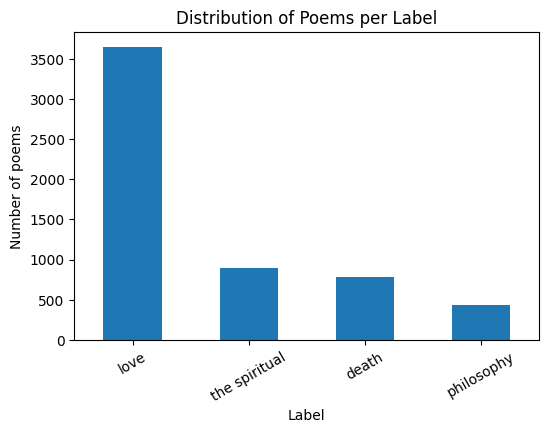

In [ ]:
import pandas as pd
import os

data_dir = "/content/dataset/labels_no_overlap_v2"

csv_path = os.path.join(data_dir, "poems_single_label.csv")

df_labels = pd.read_csv(csv_path)

counts = df_labels["Label"].value_counts().reset_index()
counts.columns = ["Label", "num_poems"]

print("تعداد شعر در هر کلاس:")
print(counts)
import matplotlib.pyplot as plt

counts.plot(kind="bar", x="Label", y="num_poems", legend=False, figsize=(6,4))
plt.ylabel("Number of poems")
plt.title("Distribution of Poems per Label")
plt.xticks(rotation=30)
plt.show()


In [ ]:
import pandas as pd
import os

data_dir = "/content/dataset/labels_no_overlap_v2"
csv_path = os.path.join(data_dir, "poems_single_label.csv")

df_labels = pd.read_csv(csv_path)

N = 100
SEED = 42  

sampled_list = []
for lab, group in df_labels.groupby("Label"):
    sample = group.sample(n=min(N, len(group)), random_state=SEED)
    sampled_list.append(sample)

sampled_df = pd.concat(sampled_list).reset_index(drop=True)

print("شکل دیتافریم نهایی:", sampled_df.shape)
print(sampled_df["Label"].value_counts())

out_path = os.path.join(data_dir, f"poems_sampled_{N}_per_label_seed{SEED}.csv")
sampled_df.to_csv(out_path, index=False)
print("ذخیره شد:", out_path)


شکل دیتافریم نهایی: (400, 7)
Label
death            100
love             100
philosophy       100
the spiritual    100
Name: count, dtype: int64
ذخیره شد: /content/dataset/labels_no_overlap_v2/poems_sampled_100_per_label_seed42.csv
